## Laboratorio 1 - Procesamiento de Imagenes

El siguiente laboratorio introduce algunos de los conceptos básicos, en lo que concierne al Procesamiento de Imagenes. Para la siguiente experiencia se utilizara las siguientes librerías.

* __numpy__: Para el trabajo con operadores vectoriales.
* __matplotlib__: Visualización y diseño de gráficos.
* __skimage__: Lectura, escritura y obtención de imágenes.

#### Importaciones necesarias

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, data
from skimage.filters import threshold_niblack, threshold_sauvola, threshold_otsu, try_all_threshold

#### Definición de funciones a usar

In [2]:
def rgb_to_grayscale(image):
    """
    This function lets you transform an image from RGB to Grayscale.
    The returned variable is the input image transformed to gray, as
    a NumPy array.
    """
    gray = .299 * image[:,:,0] + .587 * image[:,:,1] + .114 * image[:,:,2]
    gray = np.array(gray, )
    return gray

def grayscale_to_negative(image):
    """
    This function lets you transform an image from Grayscale to Negative.
    The returned variable is the input image in negative, as a NumPy array.
    """
    negative = None
    if np.max(image) > 1: negative = np.array(255 - image, dtype=np.uint8)
    else: negative = np.array(1 - image, dtype=np.uint8)
    return negative

def get_binarized_image(image, threshold):
    binary = image > threshold
    return np.array(binary)

def obtain_histogram(image, cumulative=False):
    """
    This function obtains either normal or cumulativa histogram for an image.
    Return a vector whose index positions represent a grayscale tone and contains
    every corresponding count.
    """
    histogram = np.zeros((256,2))
    for i in range(0,256):
        histogram[i,0] = i
        histogram[i,1] = np.count_nonzero(image == i)
        
    # Case when user wants the cumulative function.
    if cumulative:
        for i in np.arange(1, 256):
            histogram[i,1] += histogram[i-1,1]
    return histogram

def plot_histogram(image):
    fig, axes = plt.subplots(1,2, figsize=(8,2.5))
    ax = axes.ravel()
    
    ax[0] = plt.subplot(1,2,1)
    ax[1] = plt.subplot(1,2,2)
    
    ax[0].imshow(image, cmap=plt.cm.gray)
    ax[0].set_title("Input")
    ax[0].axis('off')
    
    ax[1].hist(image.ravel(), bins=256)
    ax[1].set_title('Histogram')
    plt.show()

def save_image(image, name, _format, grayscale=True):
    """
    This function lets you save an image either RGB or Grayscale.
    The 'image' parameter should be a NumPy array. All images are
    saved inside an output folder. If this folder does not exist,
    it will be created automatically.
    """
    try:
        # Check if 'output' folder actually exist
        if not os.path.isdir('./output'):
            print(">> 'output' folder does not exist. It will be created right now.")

            # Get the current folder path of Jupyter file
            folder_path = os.getcwd()

            # Adding 'output' folder name, depending the OS.
            if os.name == 'nt': folder_path += '\\output' # Windows case
            else: folder_path += '/output'                # Linux case

            # Folder creation
            os.mkdir(folder_path)

        # Save image with (or without) grayscaling
        if grayscale: plt.imsave('output/{}.{}'.format(name, _format), image, cmap='gray')
        else: plt.imsave('output/{}.{}'.format(name, _format), image)
        print('>> Image saved successfully!')
    
    # In case of error.
    except Exception as err:
        print('>> An error has ocurred while saving the image!')
        print(err)
        
def otsu(gray):
    pixel_number = gray.shape[0] * gray.shape[1]
    mean_weigth = 1.0/pixel_number
    his, bins = np.histogram(gray, np.arange(0,257))
    final_thresh = -1
    final_value = -1
    intensity_arr = np.arange(256)
    for t in bins[1:-1]: # This goes from 1 to 254 uint8 range (Pretty sure wont be those values)
        pcb = np.sum(his[:t])
        pcf = np.sum(his[t:])
        Wb = pcb * mean_weigth
        Wf = pcf * mean_weigth

        mub = np.sum(intensity_arr[:t]*his[:t]) / float(pcb)
        muf = np.sum(intensity_arr[t:]*his[t:]) / float(pcf)
        #print mub, muf
        value = Wb * Wf * (mub - muf) ** 2

        if value > final_value:
            final_thresh = t
            final_value = value
    final_img = gray.copy()
    print(final_thresh)
    final_img[gray > final_thresh] = 255
    final_img[gray < final_thresh] = 0
    return final_img

Dimensiones de la imagen: (512, 512, 3)


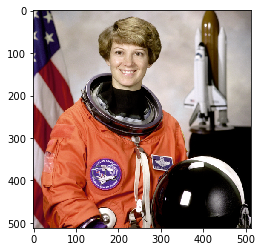

In [3]:
# Reading an image
image = io.imread("astronaut.png")

# Showing the dimensions
print("Dimensiones de la imagen: {}".format(image.shape))

# Visualization
plt.imshow(image)

>> Image saved successfully!


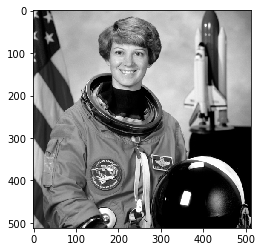

In [4]:
# Grayscale transformation
image_gray = rgb_to_grayscale(image)

# Visualization and saving
save_image(image=image_gray, name='astronaut_grayscale', _format='png')
plt.imshow(image_gray, cmap='gray')

>> Image saved successfully!


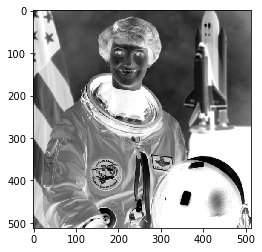

In [5]:
# Negativo para Escala de Grises (sin normalizar)
# En caso de estar normalizado -> Reemplazar 255 por 1
image_negative = 255 - image_gray
plt.imshow(image_negative, cmap='gray')
save_image(image=image_negative, name='astronaut_negative', _format='png')

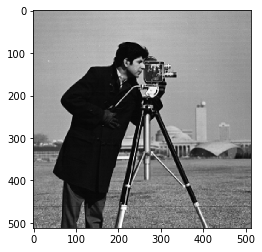

In [6]:
# A partir de una imagen, se calcula el histograma y la acumulacion.
# Luego mostrar las imagenes y los gráficos.
camera_image = data.camera()
plt.imshow(camera_image, cmap='gray')

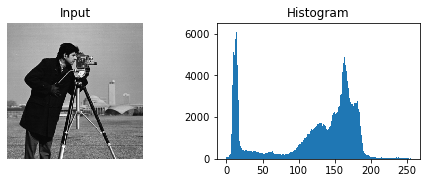

In [7]:
plot_histogram(camera_image)